In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [313]:
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [314]:
df=pd.read_csv("B_practice.csv")
df.drop('ID',axis=1, inplace=True)
data=pd.DataFrame(df)
data

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1    1.9          3         0   
4996   30           4      15     92037       4    0.4          1        85   
4997   63          39      24     93023       2    0.3          3         0   
4998   65          40      49     90034       3    0.5          2         0   
4999   28           4      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

In [315]:
data.shape

(5000, 13)

In [316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [317]:
#Personal Loan نمايش مقادير ستون  
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [318]:
data.describe()

Age   Experience       Income      ZIP Code       Family  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean     45.338400    20.134600    73.774200  93152.503000     2.396400   
std      11.463166    11.415189    46.033729   2121.852197     1.147663   
min      23.000000     0.000000     8.000000   9307.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

             CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000    5000.000000   
mean      1.937938     1.881000    56.498800       0.096000   
std       1.747659     0.839869   101.713802       0.294621   
min       0.000000     1.000000     0.000000       0.000000   
25%       0.700000     1.000000     0.000000       0.000000   
50%       1.500000     2.000000     0.000000       0.000000   
75%       2.500000     3.000000   101.000000       0.000000   
max      10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [319]:
data.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

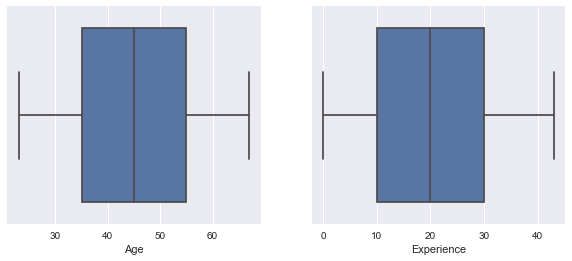

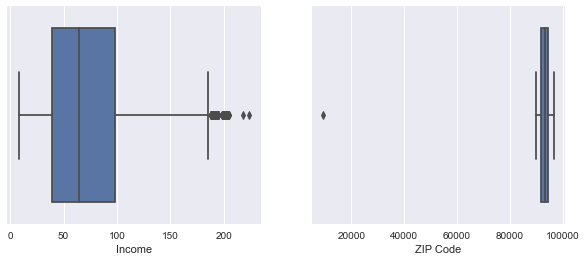

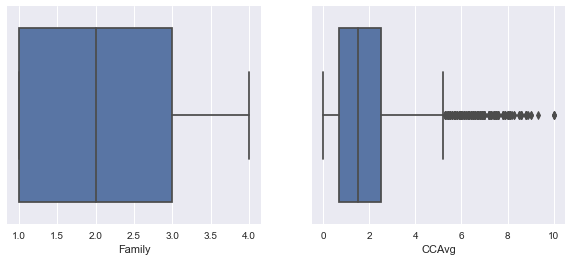

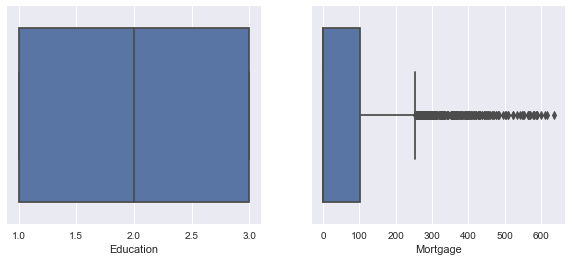

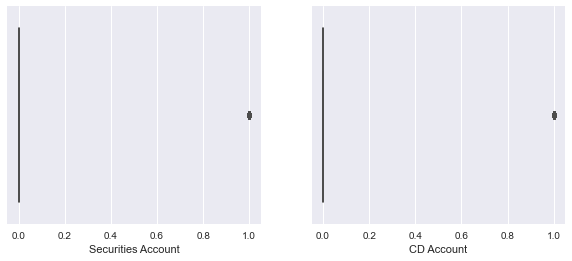

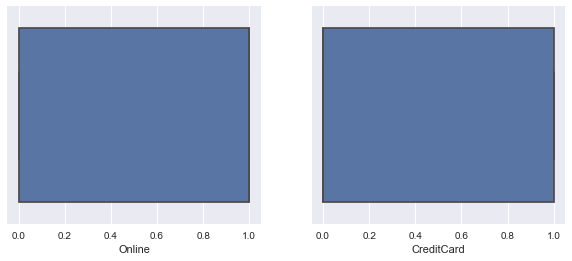

In [320]:
numerical=['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage'
           ,'Securities Account','CD Account','Online','CreditCard']
i=0
while i<12:
    fig=plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    sns.boxplot(x=numerical[i],data=data)
    i=i+1
    plt.subplot(1,2,2)
    sns.boxplot(x=numerical[i],data=data)
    i=i+1
    plt.show()
    

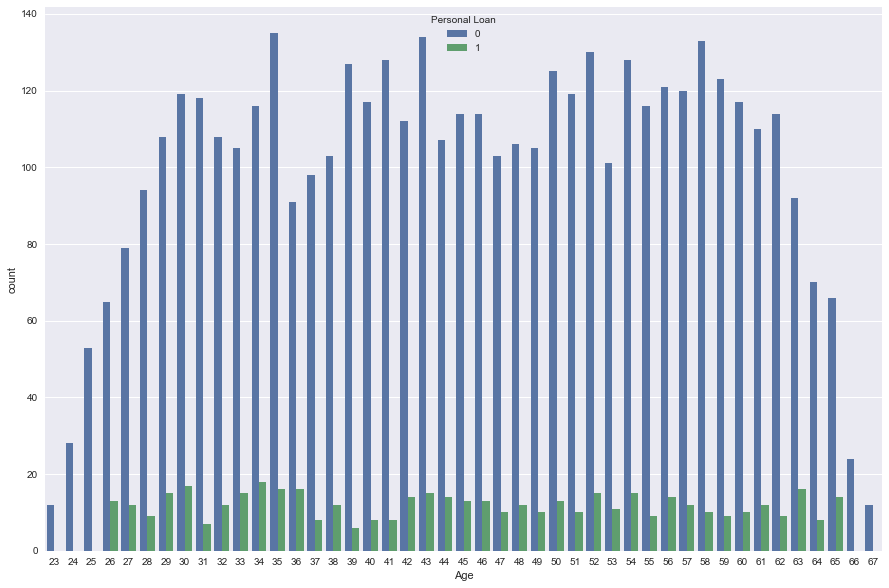

In [321]:
# تعيين شده y با Age مقايسه ستون    
plt.figure(figsize=(15,10))
sns.countplot(x='Age',hue="Personal Loan",data=data)
plt.show()


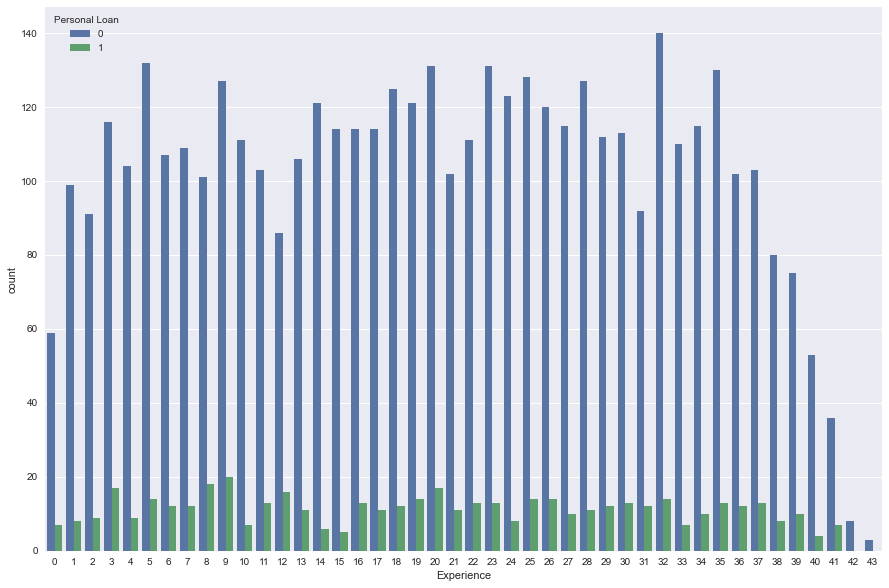

In [322]:
# تعيين شده y با Experience مقايسه ستون    
plt.figure(figsize=(15,10))
sns.countplot(x='Experience',hue="Personal Loan",data=data)
plt.show()


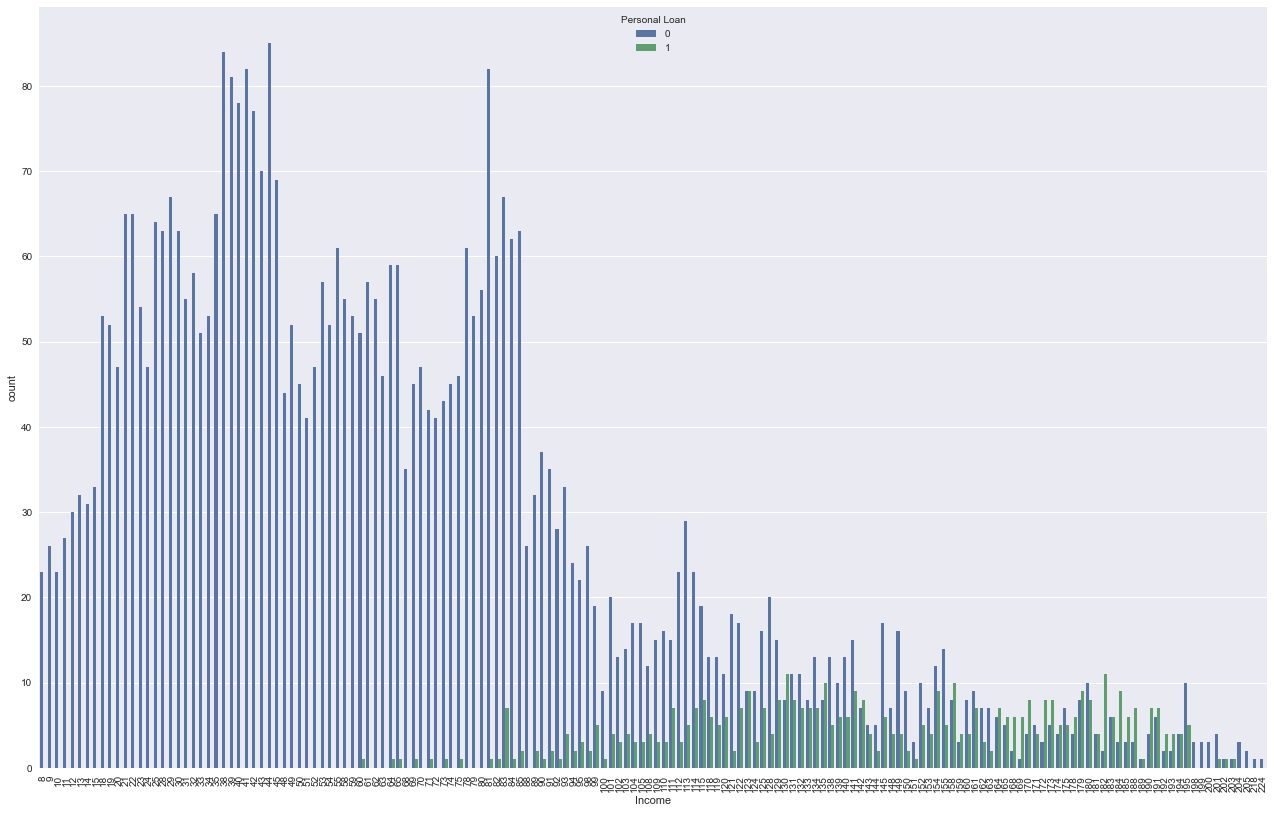

In [323]:
#تعيين شده y با Income مقايسه ستون    
plt.figure(figsize=(22,14))
plt.xticks(rotation=90)
sns.countplot(x='Income',hue="Personal Loan",data=data)
plt.show()


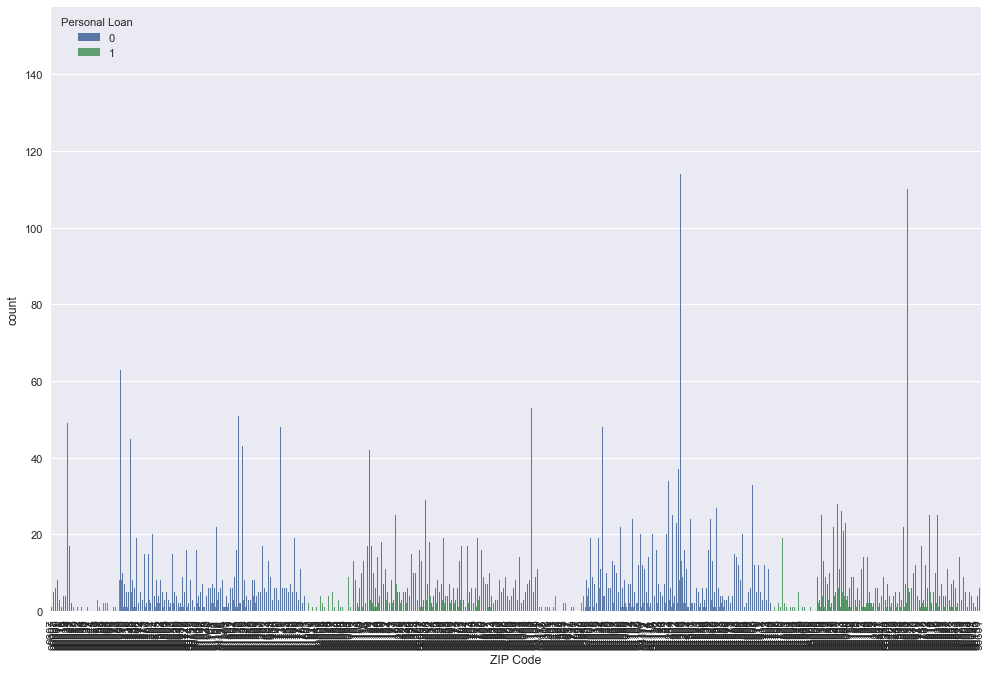

In [324]:
#تعيين شده y با ZIP Code مقايسه ستون 
plt.figure(figsize=(15,10),dpi=80)
plt.xticks(rotation=90)
sns.countplot(x='ZIP Code',hue="Personal Loan",data=data)
plt.show()

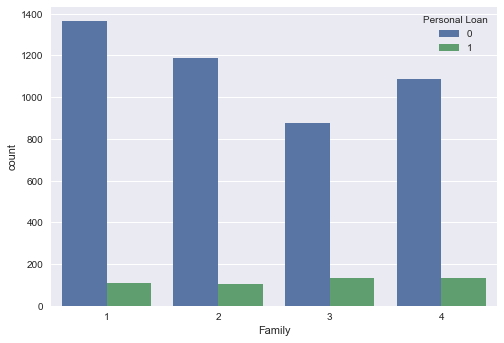

In [325]:
sns.countplot(x='Family',hue="Personal Loan",data=data)
plt.show()

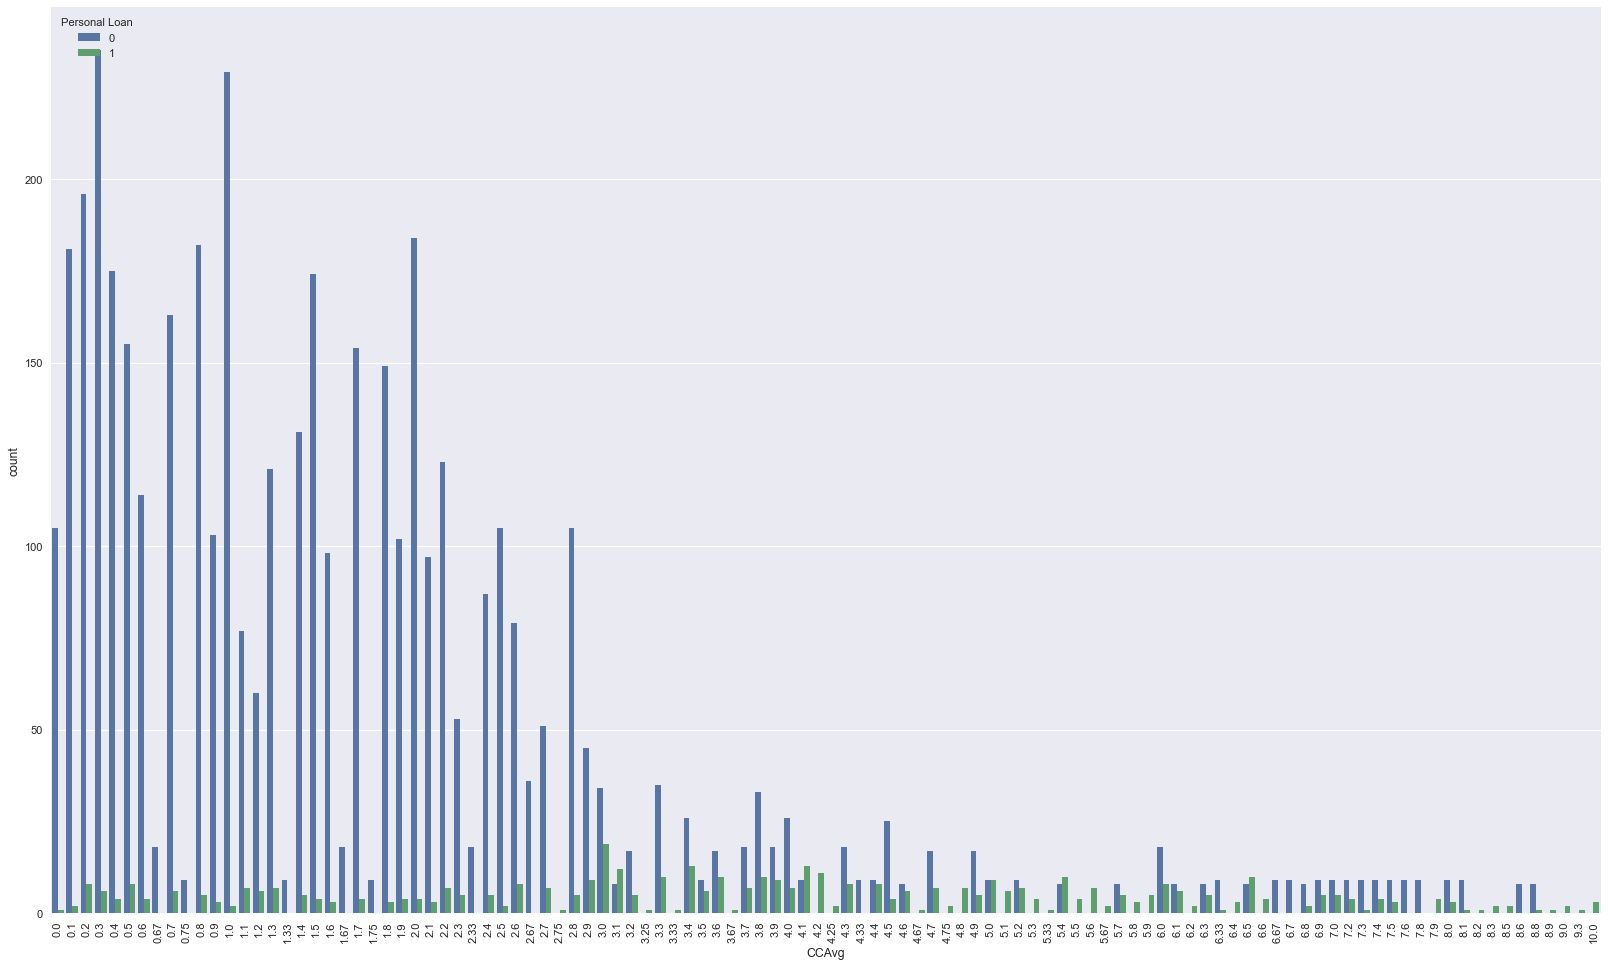

In [326]:
plt.figure(figsize=(25,15),dpi=80)
plt.xticks(rotation=90)
sns.countplot(x='CCAvg',hue="Personal Loan",data=data)
plt.show()

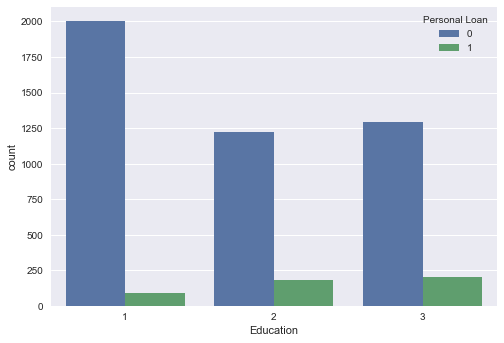

In [327]:
sns.countplot(x='Education',hue="Personal Loan",data=data)
plt.show()

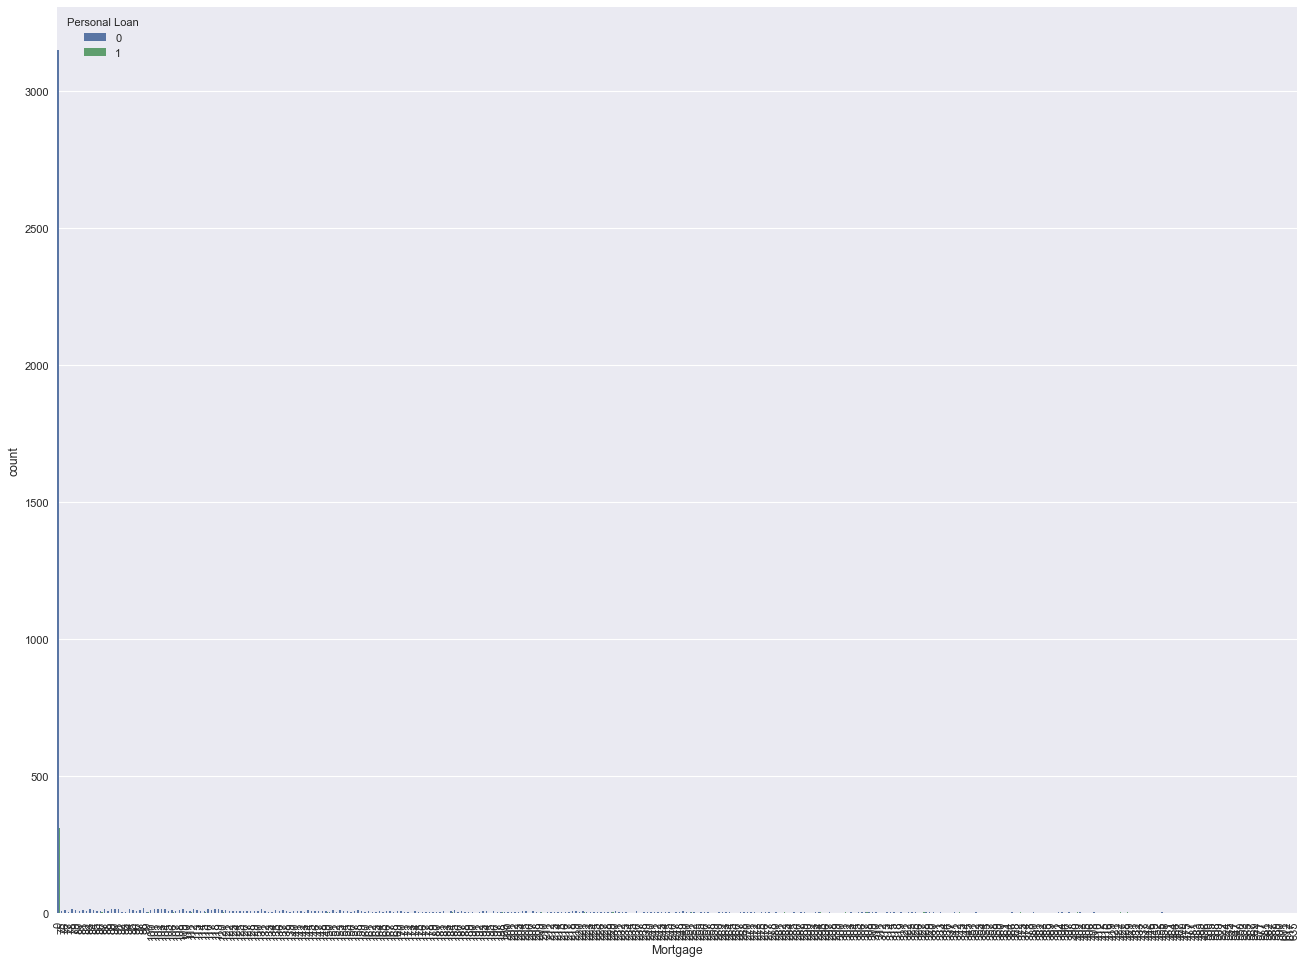

In [328]:
plt.figure(figsize=(20,15),dpi=80)
plt.xticks(rotation=90)
sns.countplot(x='Mortgage',hue="Personal Loan",data=data)
plt.show()

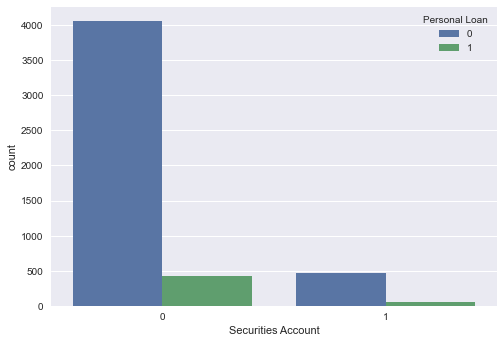

In [329]:
sns.countplot(x='Securities Account',hue="Personal Loan",data=data)
plt.show()

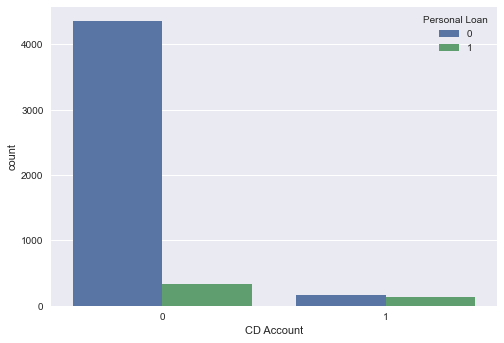

In [330]:
sns.countplot(x='CD Account',hue="Personal Loan",data=data)
plt.show()

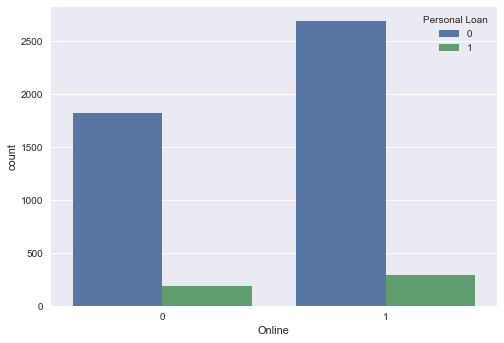

In [331]:
sns.countplot(x='Online',hue="Personal Loan",data=data)
plt.show()

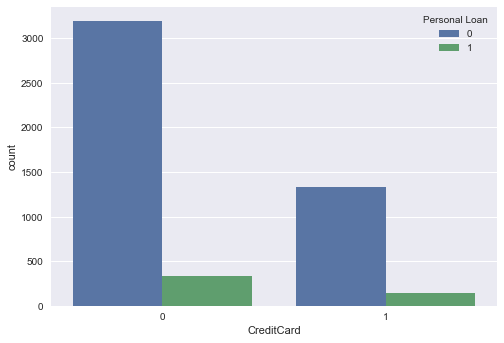

In [332]:
sns.countplot(x='CreditCard',hue="Personal Loan",data=data)
plt.show()

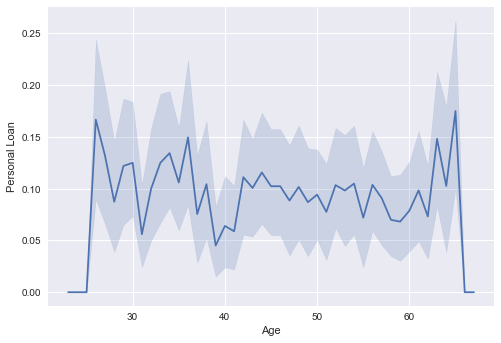

In [333]:
sns.lineplot(data=data,x='Age',y='Personal Loan')
plt.show()

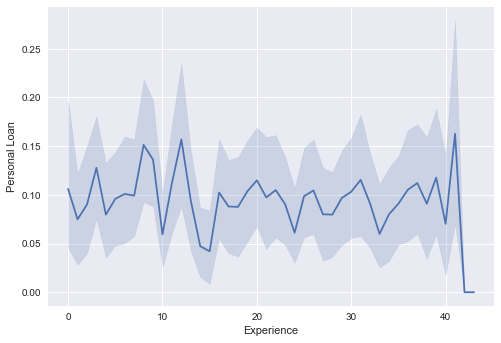

In [334]:
sns.lineplot(data=data,x='Experience',y='Personal Loan')
plt.show()

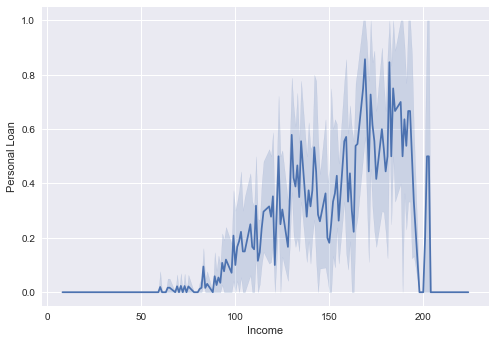

In [335]:
sns.lineplot(data=data,x='Income',y='Personal Loan')
plt.show()

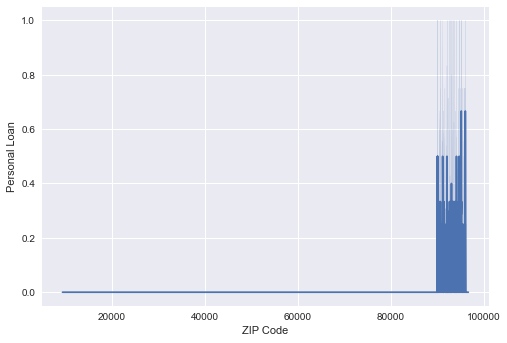

In [336]:
sns.lineplot(data=data,x='ZIP Code',y='Personal Loan')
plt.show()

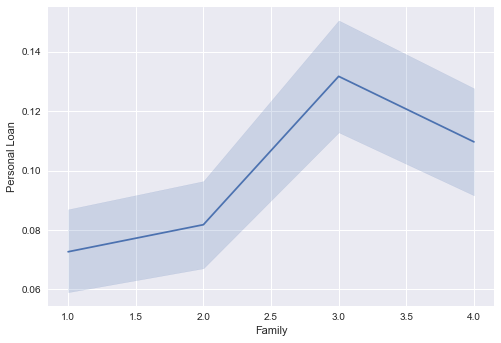

In [337]:
sns.lineplot(data=data,x='Family',y='Personal Loan')
plt.show()

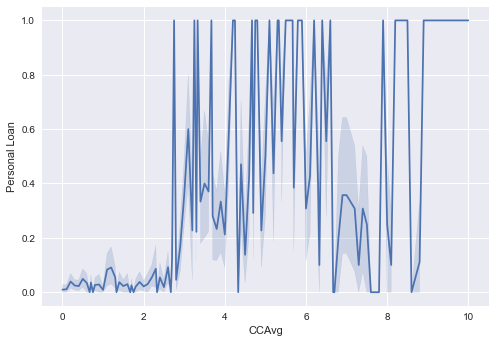

In [338]:
sns.lineplot(data=data,x='CCAvg',y='Personal Loan')
plt.show()

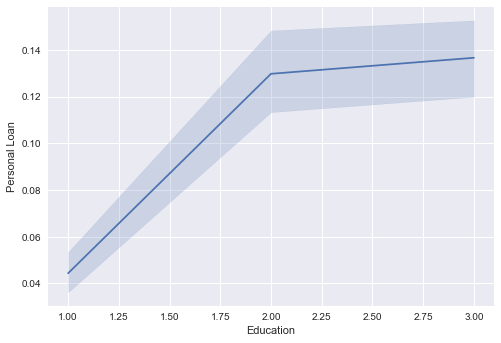

In [339]:
sns.lineplot(data=data,x='Education',y='Personal Loan')
plt.show()

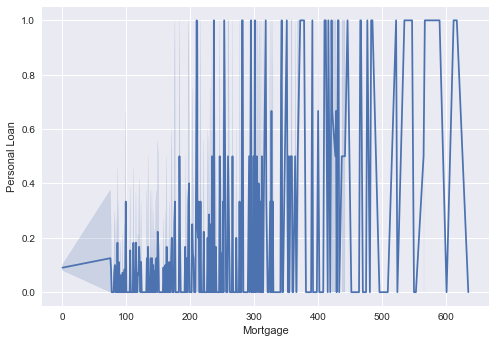

In [340]:
sns.lineplot(data=data,x='Mortgage',y='Personal Loan')
plt.show()

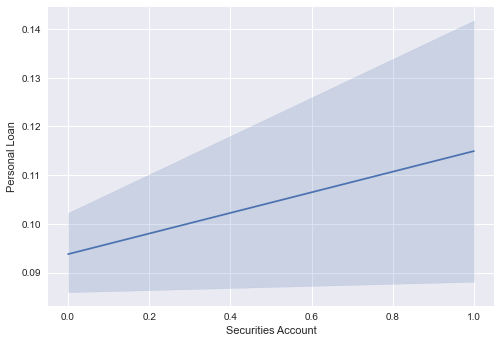

In [341]:
sns.lineplot(data=data,x='Securities Account',y='Personal Loan')
plt.show()

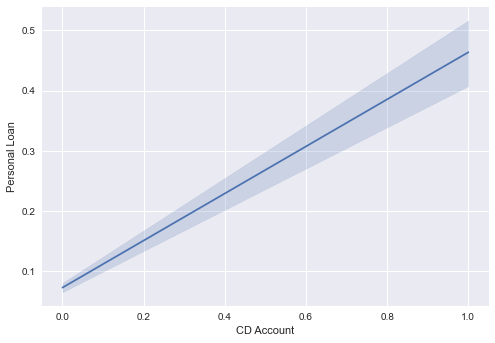

In [342]:
sns.lineplot(data=data,x='CD Account',y='Personal Loan')
plt.show()

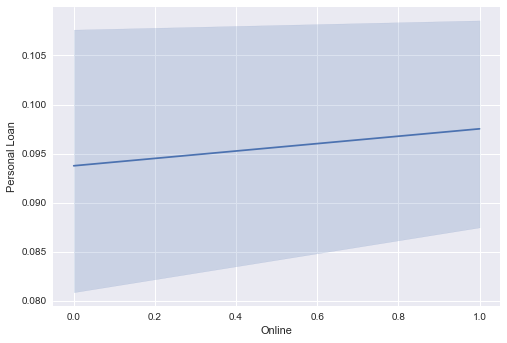

In [343]:
sns.lineplot(data=data,x='Online',y='Personal Loan')
plt.show()

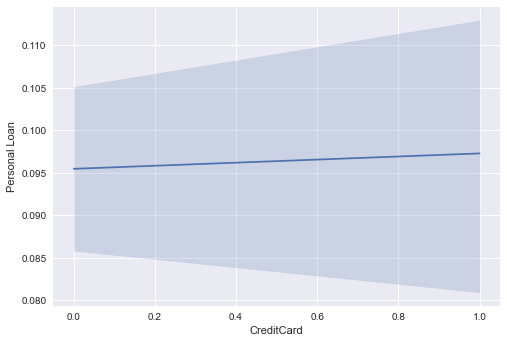

In [344]:
sns.lineplot(data=data,x='CreditCard',y='Personal Loan')
plt.show()

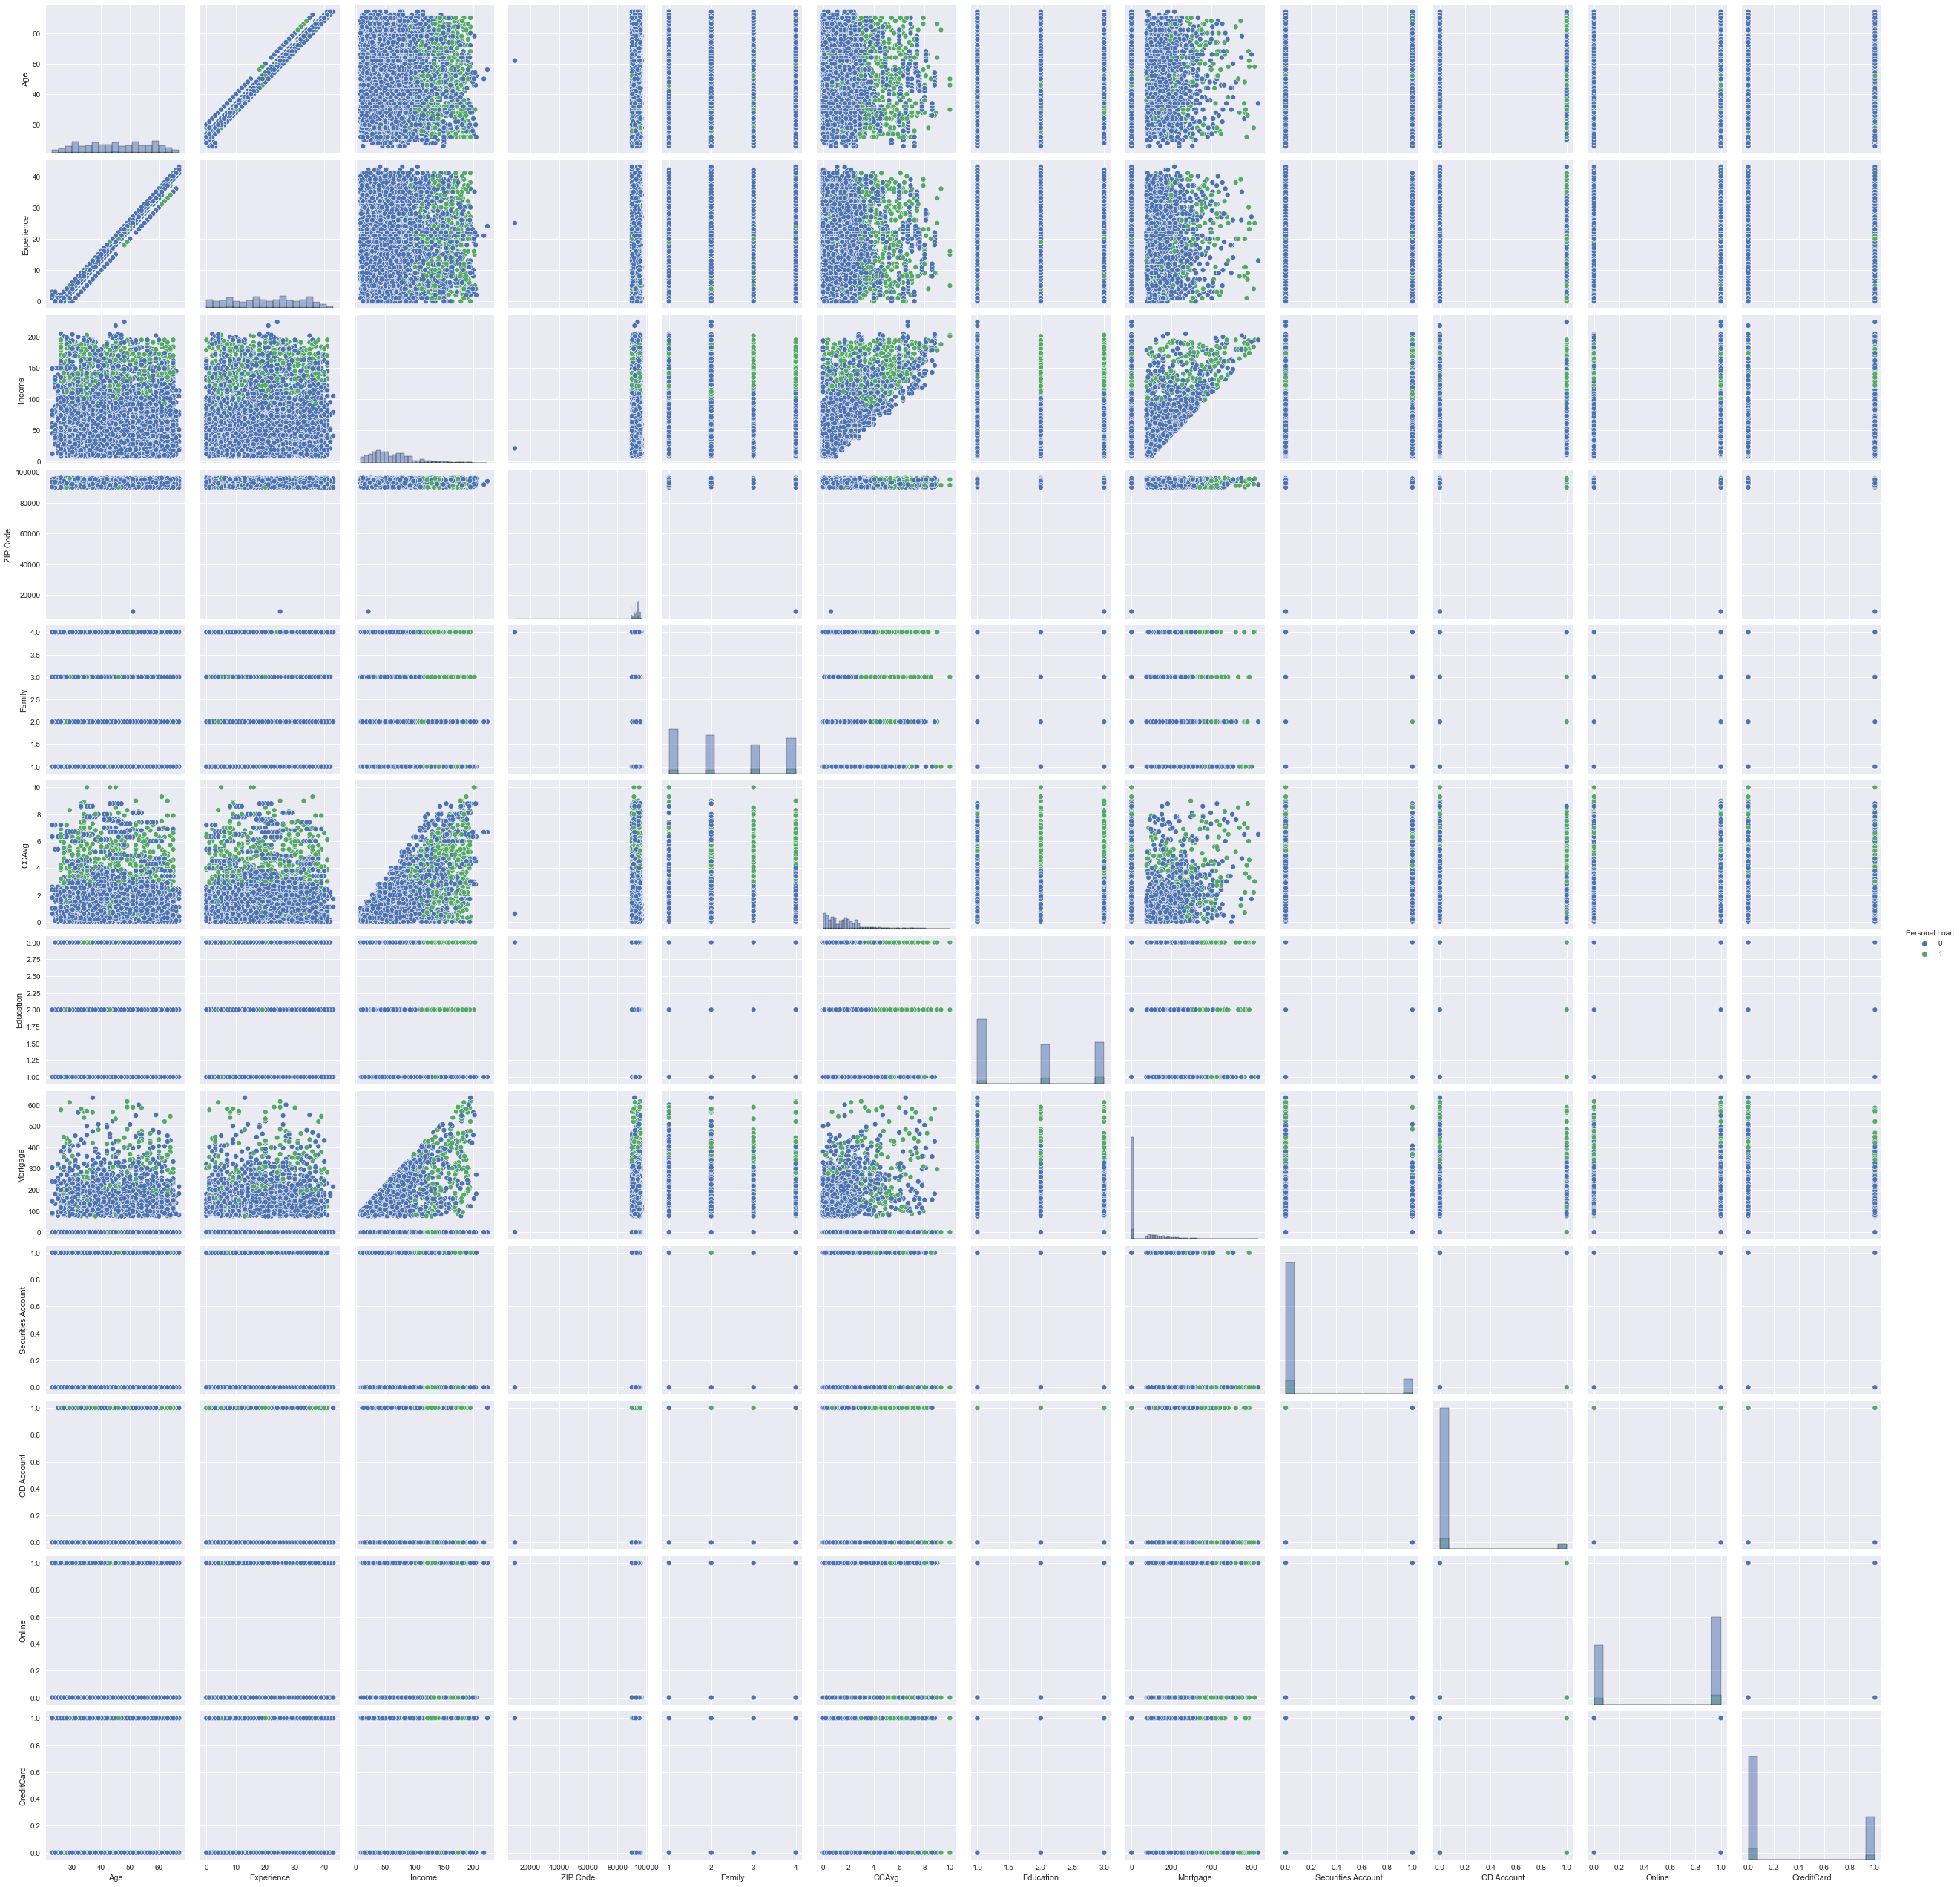

In [345]:
# که دو دسته بندي 0و1 داردy مقايسه تمام ستونها با ستون ايگرگ و نمايش فيچرها براساس دسته بندي ستون   
sns.pairplot(data,hue='Personal Loan', height=3,diag_kind="hist")
plt.show()

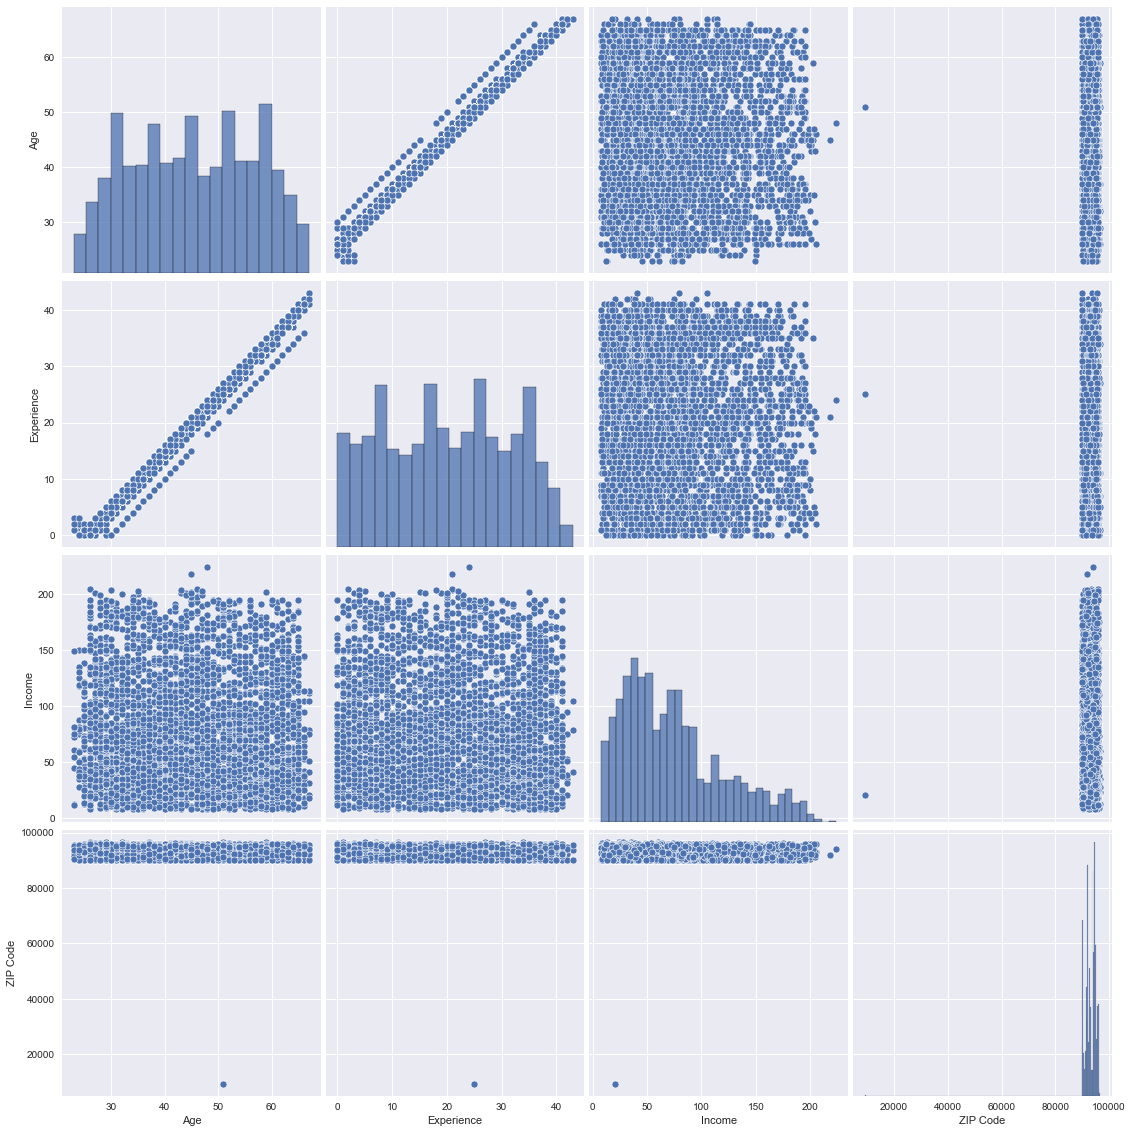

In [346]:
sns.pairplot(
    data,
    x_vars=['Age','Experience','Income','ZIP Code'],
    y_vars=['Age','Experience','Income','ZIP Code'],height=4,diag_kind="hist"
)

plt.show()

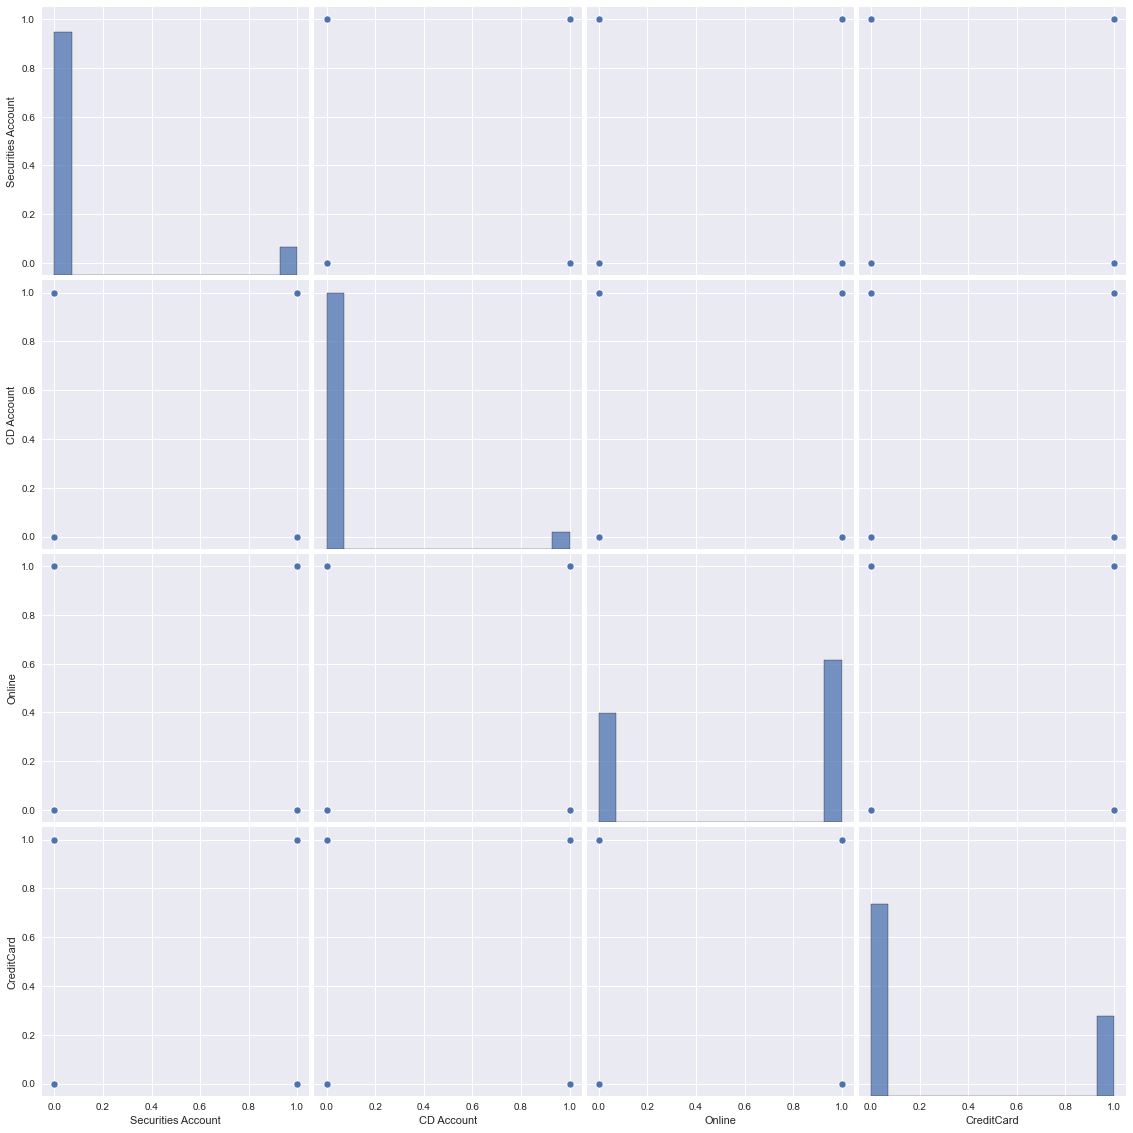

In [347]:
sns.pairplot(
    data,
    x_vars=['Securities Account','CD Account','Online','CreditCard'],
    y_vars=['Securities Account','CD Account','Online','CreditCard'],height=4,kind="scatter"
)

plt.show()

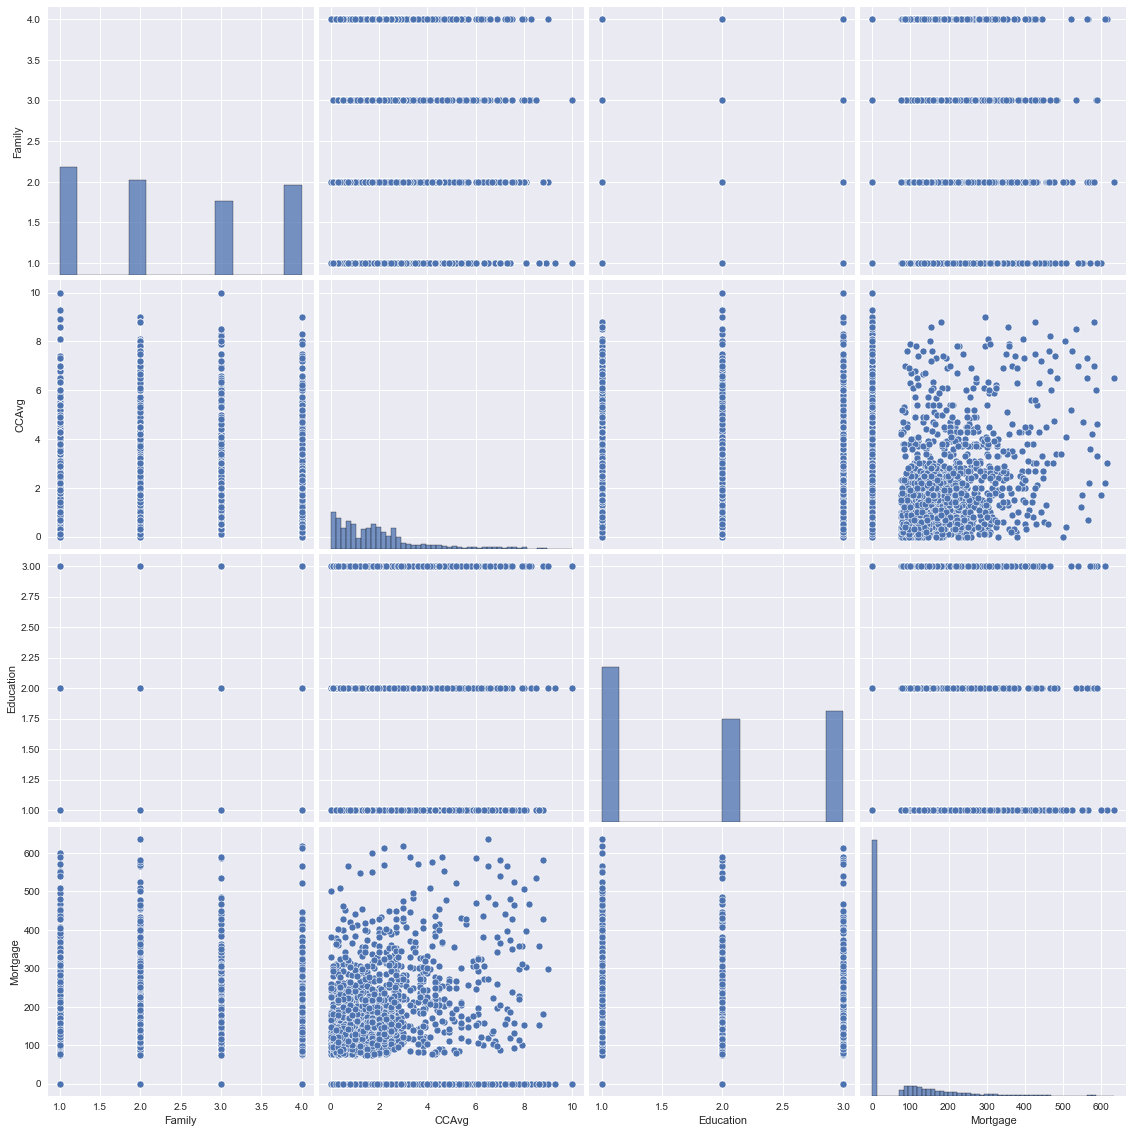

In [348]:
sns.pairplot(
    data,
    x_vars=['Family','CCAvg','Education','Mortgage'],
    y_vars=['Family','CCAvg','Education','Mortgage'],height=4,diag_kind="hist"
)

plt.show()

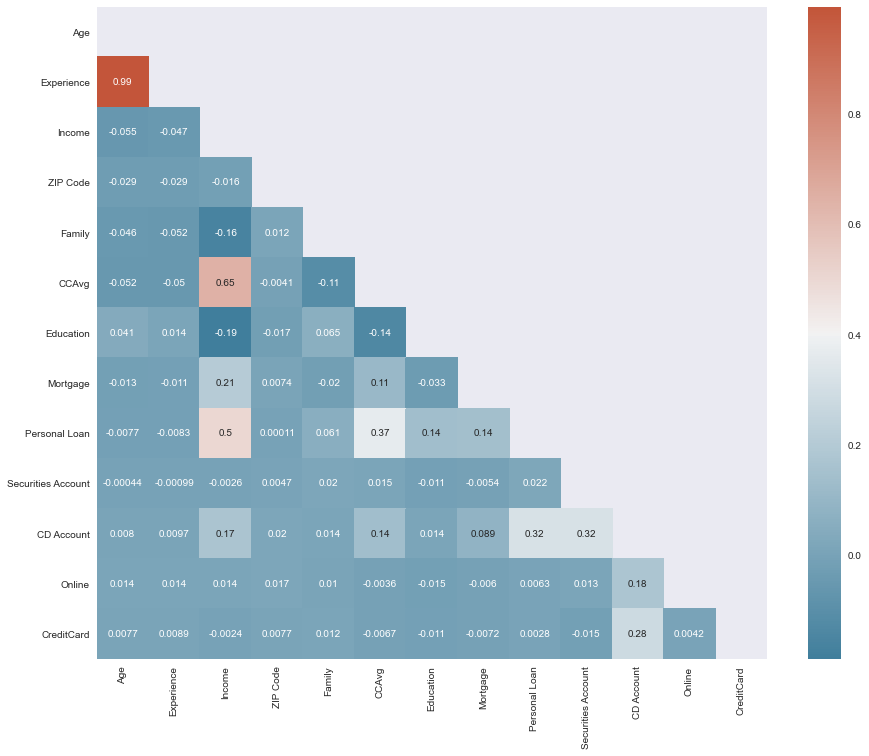

In [349]:
#است income با ستون y رسم جدول همبستگي  که بيشترين همبستگي 
corr = data.corr()
f, ax = plt.subplots(figsize=(15, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.show()

In [350]:
#نمايش کروليشن يا همان همبستگي
data.corr()

Age  Experience    Income  ZIP Code    Family  \
Age                 1.000000    0.993991 -0.055269 -0.029216 -0.046418   
Experience          0.993991    1.000000 -0.046876 -0.028936 -0.051851   
Income             -0.055269   -0.046876  1.000000 -0.016410 -0.157501   
ZIP Code           -0.029216   -0.028936 -0.016410  1.000000  0.011778   
Family             -0.046418   -0.051851 -0.157501  0.011778  1.000000   
CCAvg              -0.052012   -0.049738  0.645984 -0.004061 -0.109275   
Education           0.041334    0.013919 -0.187524 -0.017377  0.064929   
Mortgage           -0.012539   -0.011097  0.206806  0.007383 -0.020445   
Personal Loan      -0.007726   -0.008304  0.502462  0.000107  0.061367   
Securities Account -0.000436   -0.000989 -0.002616  0.004704  0.019994   
CD Account          0.008043    0.009735  0.169738  0.019972  0.014110   
Online              0.013702    0.014051  0.014206  0.016990  0.010354   
CreditCard          0.007681    0.008851 -0.002385  0.007691  0.011588   

                       CCAvg  Education  Mortgage  Personal Loan  \
Age                -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.049738   0.013919 -0.011097      -0.008304   
Income              0.645984  -0.187524  0.206806       0.502462   
ZIP Code           -0.004061  -0.017377  0.007383       0.000107   
Family             -0.109275   0.064929 -0.020445       0.061367   
CCAvg               1.000000  -0.136124  0.109905       0.366889   
Education          -0.136124   1.000000 -0.033327       0.136722   
Mortgage            0.109905  -0.033327  1.000000       0.142095   
Personal Loan       0.366889   0.136722  0.142095       1.000000   
Securities Account  0.015086  -0.010812 -0.005411       0.021954   
CD Account          0.136534   0.013934  0.089311       0.316355   
Online             -0.003611  -0.015004 -0.005995       0.006278   
CreditCard         -0.006689  -0.011014 -0.007231       0.002802   

                    Securities Account  CD Account    Online  CreditCard  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.000989    0.009735  0.014051    0.008851  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIP Code                      0.004704    0.019972  0.016990    0.007691  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal Loan                 0.021954    0.316355  0.006278    0.002802  
Securities Account            1.000000    0.317034  0.012627   -0.015028  
CD Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

In [351]:
#الگوريتم لاجستيک رگرشن

In [352]:
x=pd.DataFrame(data,columns=['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage'
                            ,'Securities Account','CD Account','Online','CreditCard'])
y=data['Personal Loan'].values.reshape(-1,1)


In [353]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.26,random_state=0)

In [354]:
logreg=LogisticRegression(solver='liblinear',C=10.0,random_state=0)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [355]:
print('Acuuracy: ',metrics.accuracy_score(y_test,y_pred))

Acuuracy:  0.9215384615384615


In [356]:
print('1',metrics.mean_absolute_error(y_test,y_pred))
print('2',metrics.mean_squared_error(y_test,y_pred))
print('3',metrics.mean_squared_log_error(y_test,y_pred))
print('4', metrics.r2_score(y_test,y_pred))

1 0.07846153846153846
2 0.07846153846153846
3 0.03769708263050503
4 0.003427128427128112


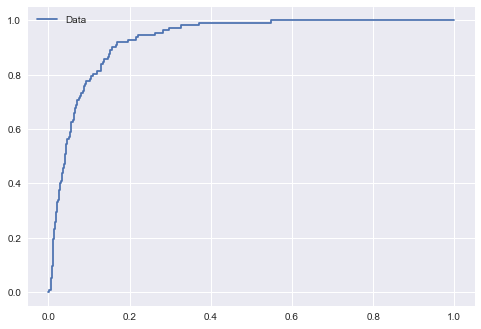

In [357]:
y_pred_proba=logreg.predict_proba(x_test)[::,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='Data')
plt.legend(loc=2)
plt.show()

In [358]:
#نمايش تعدا کلاس ها
logreg.classes_

array([0, 1], dtype=int64)

In [359]:
#نمايش نقطه شروع
logreg.intercept_

array([-8.81646327e-05])

In [360]:
 #هاي ديتاست x نمايش ضرايب 
logreg.coef_

array([[ 7.68359173e-03,  5.43204310e-03,  3.57663630e-02,
        -7.00252765e-05,  1.38706371e-02,  5.96065846e-03,
         1.60399581e-02,  8.91029390e-04,  1.00550155e-03,
         4.27958996e-03, -6.17057598e-04,  4.77479887e-05]])

In [361]:
logreg.predict_proba(x)

array([[0.98722922, 0.01277078],
       [0.98980863, 0.01019137],
       [0.99704837, 0.00295163],
       ...,
       [0.9924759 , 0.0075241 ],
       [0.9772332 , 0.0227668 ],
       [0.96150388, 0.03849612]])

In [362]:
logreg.predict(x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [363]:
logreg.score(x,y)

0.908

In [364]:
# نمايش ماتريسي ارزيابي نوع کانفيژن ماتريس
confusion_matrix(y, logreg.predict(x))

array([[4381,  139],
       [ 321,  159]], dtype=int64)

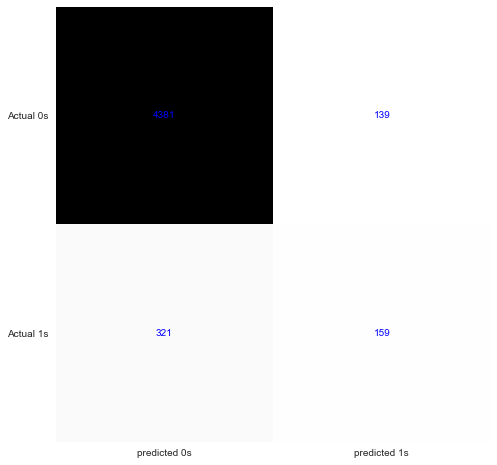

In [365]:
#نمايش گرافيکي ارزيابي مدل کانفيژن ماتريس
cm=confusion_matrix(y, logreg.predict(x))
fig,ax=plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=("predicted 0s","predicted 1s"))
ax.yaxis.set(ticks=(0,1), ticklabels=("Actual 0s","Actual 1s"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color="blue")
plt.show()

In [366]:
print(classification_report(y,logreg.predict(x)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4520
           1       0.53      0.33      0.41       480

    accuracy                           0.91      5000
   macro avg       0.73      0.65      0.68      5000
weighted avg       0.89      0.91      0.90      5000



In [367]:
data

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1    1.9          3         0   
4996   30           4      15     92037       4    0.4          1        85   
4997   63          39      24     93023       2    0.3          3         0   
4998   65          40      49     90034       3    0.5          2         0   
4999   28           4      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

In [368]:
#ساخت يک سطر براي انجام تست فرايند پيش بيني کردن
df2=pd.DataFrame({'Age':[42],'Experience':[16],'Income':[30],'ZIP Code':[92037],'Family':[3],'CCAvg':[1.2],'Education':[1]
                   ,'Mortgage':[0],'Personal Loan':[0],'Securities Account':[1],'CD Account':[0],'Online':[1],'CreditCard':[1]})
df2

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   42          16      30     92037       3    1.2          1         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       1           1

In [369]:
#x,y اضافه کردن سطر به انتهايي ديتاست قبلي و ساخت 
data2=data.append(df2)
data2

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4996   30           4      15     92037       4    0.4          1        85   
4997   63          39      24     93023       2    0.3          3         0   
4998   65          40      49     90034       3    0.5          2         0   
4999   28           4      83     92612       3    0.8          1         0   
0      42          16      30     92037       3    1.2          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  
0                 0                   1           0       1           1  

[5001 rows x 13 columns]

In [370]:
x_train=data2[['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage',
              'Securities Account','CD Account','Online','CreditCard']][:5000]
y_train=data2[['Personal Loan']][:5000].values.reshape(-1,1)

In [371]:
x_test=data2[['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage',
              'Securities Account','CD Account','Online','CreditCard']][5000:]

In [372]:
model2=LogisticRegression(solver='liblinear',C=10, random_state=0)
model2.fit(x_train,y_train.ravel())

LogisticRegression(C=10, random_state=0, solver='liblinear')

In [373]:
y_pred=model2.predict(x_test)

In [374]:
print(y_pred)

[0]


In [375]:
#شروع الگوريتم نايو بيز

In [376]:
#از الگوريتم مالتي ناميا استفاده ميکنيم چون هم ديتايي گسسته داريم هم ديتاي پيوسته وتعداد ديتاي گسسته بيشتر است 
#الگوريتم گاوسين براي ديتاهاي با فيچرهاي گسسته به کار ميرود و همچنين براي ديتاهاي مربوط به طبيعت بيشتر کاربرد دارد
#الگوريتم برنالي نيز براي ديتاست هايي که فيچچرهاي گسسته و باينري دارند به کار ميرود



In [377]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

In [378]:
x=pd.DataFrame(data,columns=['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage'
                            ,'Securities Account','CD Account','Online','CreditCard'])
y=data['Personal Loan'].values.reshape(-1,1)


In [379]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=0)

In [380]:
# الگوريتم مالتيناميا
multi=MultinomialNB()
multi.fit(x_train,y_train.ravel())
y_pred=multi.predict(x_test)
print('Accurace: ',metrics.accuracy_score(y_test,y_pred))

Accurace:  0.7704347826086957


In [381]:
#الگوريتم گاوسين
gau=GaussianNB()
gau.fit(x_train,y_train.ravel())
y_pred=gau.predict(x_test)
print('Accurace: ',metrics.accuracy_score(y_test,y_pred))

Accurace:  0.8947826086956522


In [382]:
#الگوريتم کامپلمنت
com=ComplementNB()
com.fit(x_train,y_train.ravel())
y_pred=com.predict(x_test)
print('Accurace: ',metrics.accuracy_score(y_test,y_pred))

Accurace:  0.7678260869565218


In [383]:
#الگوريتم برنالي
ber=BernoulliNB()
ber.fit(x_train,y_train.ravel())
y_pred=ber.predict(x_test)
print('Accurace: ',metrics.accuracy_score(y_test,y_pred))

Accurace:  0.9078260869565218


In [384]:
multi.classes_

array([0, 1], dtype=int64)

In [385]:
multi.intercept_

array([-2.32358324])

In [386]:
multi.coef_

array([[-7.64217007e+00, -8.46873877e+00, -6.47688041e+00,
        -3.39724184e-03, -1.04816154e+01, -1.00859349e+01,
        -1.06355974e+01, -6.85385257e+00, -1.34070062e+01,
        -1.26859503e+01, -1.19746208e+01, -1.26768178e+01]])

In [387]:
confusion_matrix(y,multi.predict(x))

array([[3624,  896],
       [ 216,  264]], dtype=int64)

In [388]:
print(classification_report(y,multi.predict(x)))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      4520
           1       0.23      0.55      0.32       480

    accuracy                           0.78      5000
   macro avg       0.59      0.68      0.59      5000
weighted avg       0.87      0.78      0.81      5000



In [389]:
#وارد کردن ورودي براي انجام فرايند پيش بيني به روش ساده تر.اين اعدا وارد شده بايد براساس ترتيب ستون ها باشد
pre2=multi.predict([[42,16,30,92037,3,1.2,1,0,1,0,1,1]])
pre2

array([0], dtype=int64)

In [390]:
#استفاده از کيفولد
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
print(cross_val_score(multi,x,y.ravel(), cv=KFold(50),n_jobs=1))

[0.8  0.76 0.88 0.77 0.82 0.76 0.69 0.83 0.82 0.73 0.77 0.76 0.79 0.78
 0.73 0.75 0.8  0.73 0.78 0.8  0.74 0.78 0.82 0.8  0.79 0.78 0.71 0.74
 0.73 0.72 0.67 0.77 0.86 0.76 0.76 0.81 0.81 0.81 0.76 0.79 0.84 0.73
 0.81 0.82 0.84 0.83 0.77 0.79 0.76 0.8 ]


In [391]:
data

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1    1.9          3         0   
4996   30           4      15     92037       4    0.4          1        85   
4997   63          39      24     93023       2    0.3          3         0   
4998   65          40      49     90034       3    0.5          2         0   
4999   28           4      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

In [392]:
#ساخت يک ديتافريم ديگر که فيچرهاي کم اهميت از آن حذف شده و مدل برروي آن اعمال ميشود
df3=pd.DataFrame(data)
df4=df3[df3.index<2700]
df5=df3[df3.index>3200]
df6=df4.append(df5)
df6.reset_index(drop=True,inplace=True)
df6

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4494   29           3      40     92697       1    1.9          3         0   
4495   30           4      15     92037       4    0.4          1        85   
4496   63          39      24     93023       2    0.3          3         0   
4497   65          40      49     90034       3    0.5          2         0   
4498   28           4      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4494              0                   0           0       1           0  
4495              0                   0           0       1           0  
4496              0                   0           0       0           0  
4497              0                   0           0       1           0  
4498              0                   0           0       1           1  

[4499 rows x 13 columns]

In [393]:
x=pd.DataFrame(df6,columns=['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage'
                            ,'Securities Account','CD Account','Online','CreditCard'])
y=df6['Personal Loan'].values.reshape(-1,1)


In [394]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=0)

In [395]:
# در الگوريتم مالتيناميا قبل از حذف فيچرهاي کم اهميت با استفاده از حالت کيفولد، اسکور 0.77 بود اما اکنون اسکور به 0.81 رسيده است
multi1=MultinomialNB()
multi1.fit(x_train,y_train.ravel())
y_pred=multi1.predict(x_test)
print('Accurace: ',metrics.accuracy_score(y_test,y_pred))

Accurace:  0.8144927536231884


In [396]:
confusion_matrix(y,multi1.predict(x))

array([[3272,  795],
       [ 184,  248]], dtype=int64)

In [397]:
print(classification_report(y,multi1.predict(x)))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      4067
           1       0.24      0.57      0.34       432

    accuracy                           0.78      4499
   macro avg       0.59      0.69      0.60      4499
weighted avg       0.88      0.78      0.82      4499



In [398]:
# KNN شروع الگوريتم

In [399]:
data

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1    1.9          3         0   
4996   30           4      15     92037       4    0.4          1        85   
4997   63          39      24     93023       2    0.3          3         0   
4998   65          40      49     90034       3    0.5          2         0   
4999   28           4      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

In [400]:
from sklearn.neighbors import KNeighborsClassifier #فراخواني الگوريم

In [401]:
# x,y تعريف 
x=pd.DataFrame(data,columns=['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage'
                            ,'Securities Account','CD Account','Online','CreditCard']).values
y=data['Personal Loan'].values.reshape(-1,1)

In [402]:
#تعريف تست و ترين ها
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=0)

In [403]:
#  به صورت دستي K انتخاب بهترين 
k=10
knn=KNeighborsClassifier(k)
knn.fit(x_train,y_train.ravel())
y_pred=knn.predict(x_test)
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9173333333333333


In [404]:
#با حلقه  K  انتخاب بهترين
k=7
Acc=np.zeros((k))
for i in range(1,1+k):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train.ravel())
    y_pred=knn.predict(x_test)
    Acc[i-1]=metrics.accuracy_score(y_test,y_pred)
Acc    

array([0.896     , 0.91733333, 0.90933333, 0.91466667, 0.91866667,
       0.916     , 0.92266667])

In [405]:
print(np.max(Acc))
print(np.min(Acc))

0.9226666666666666
0.896


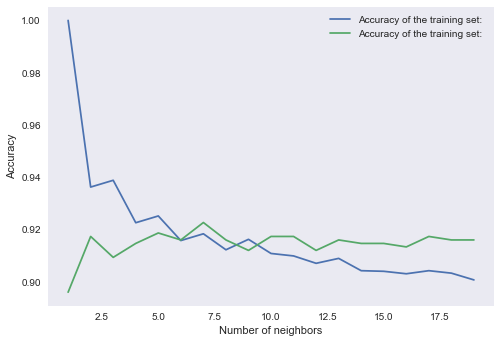

In [406]:
training_acc=[]
test_acc=[]
neighbors_setting=range(1,20)
for n_neighbors in neighbors_setting:
    knn1=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn1.fit(x_train,y_train.ravel())
    training_acc.append(knn1.score(x_train,y_train))
    test_acc.append(knn1.score(x_test,y_test))

plt.plot(neighbors_setting,training_acc,label='Accuracy of the training set: ')
plt.plot(neighbors_setting,test_acc,label='Accuracy of the training set: ')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.grid()
plt.legend()
plt.show()

In [407]:
#به اعدا صحيح و بررسي تاثير آن بر مدل CCAvg تبديل اعدا اعشاري ستون 
data['CCAvg'] = data['CCAvg'].apply(np.ceil)
data['CCAvg'] = data['CCAvg'].astype('Int64')
data

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4      2          1         0   
1      45          19      34     90089       3      2          1         0   
2      39          15      11     94720       1      1          1         0   
3      35           9     100     94112       1      3          2         0   
4      35           8      45     91330       4      1          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1      2          3         0   
4996   30           4      15     92037       4      1          1        85   
4997   63          39      24     93023       2      1          3         0   
4998   65          40      49     90034       3      1          2         0   
4999   28           4      83     92612       3      1          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

In [408]:
x1=pd.DataFrame(data,columns=['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage'
                            ,'Securities Account','CD Account','Online','CreditCard'])
y1=data['Personal Loan'].values.reshape(-1,1)
x1

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4      2          1         0   
1      45          19      34     90089       3      2          1         0   
2      39          15      11     94720       1      1          1         0   
3      35           9     100     94112       1      3          2         0   
4      35           8      45     91330       4      1          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1      2          3         0   
4996   30           4      15     92037       4      1          1        85   
4997   63          39      24     93023       2      1          3         0   
4998   65          40      49     90034       3      1          2         0   
4999   28           4      83     92612       3      1          1         0   

      Securities Account  CD Account  Online  CreditCard  
0                      1           0       0           0  
1                      1           0       0           0  
2                      0           0       0           0  
3                      0           0       0           0  
4                      0           0       0           1  
...                  ...         ...     ...         ...  
4995                   0           0       1           0  
4996                   0           0       1           0  
4997                   0           0       0           0  
4998                   0           0       1           0  
4999                   0           0       1           1  

[5000 rows x 12 columns]

In [409]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 5000 non-null   int64
 1   Experience          5000 non-null   int64
 2   Income              5000 non-null   int64
 3   ZIP Code            5000 non-null   int64
 4   Family              5000 non-null   int64
 5   CCAvg               5000 non-null   Int64
 6   Education           5000 non-null   int64
 7   Mortgage            5000 non-null   int64
 8   Personal Loan       5000 non-null   int64
 9   Securities Account  5000 non-null   int64
 10  CD Account          5000 non-null   int64
 11  Online              5000 non-null   int64
 12  CreditCard          5000 non-null   int64
dtypes: Int64(1), int64(12)
memory usage: 512.8 KB


In [410]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.26,random_state=0)

In [411]:
logreg=LogisticRegression(solver='liblinear',C=10.0,random_state=0)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [412]:
print('Acuuracy: ',metrics.accuracy_score(y_test,y_pred))

Acuuracy:  0.9215384615384615


In [413]:
#با تبديل اعشاري و گرد کردن آن به سمت مثبت تاثيري مثبتي در روند مدل ايجاد نشد

In [414]:
print('1',metrics.mean_absolute_error(y_test,y_pred))
print('2',metrics.mean_squared_error(y_test,y_pred))
print('3',metrics.mean_squared_log_error(y_test,y_pred))
print('4', metrics.r2_score(y_test,y_pred))

1 0.07846153846153846
2 0.07846153846153846
3 0.03769708263050503
4 0.003427128427128112


In [415]:
# الگوريتم مالتيناميا
multi=MultinomialNB()
multi.fit(x_train,y_train.ravel())
y_pred=multi.predict(x_test)
print('Accurace: ',metrics.accuracy_score(y_test,y_pred))

Accurace:  0.7723076923076924
